# Agricultural Production Optimization 
 __Problem Statement:__  Build a Prdictive Model so as to suggest the most suitable Crops to grow based on the available Climatic and Soil conditions.<br>
__Goal:__ Achive Precision Farming by Optimizing the Agricultural Production.

This Project is intended on Precision Farming.<br>
   - We have to optimize Productivity
   - By understanding requirements of Climatic and Soil Conditions for Crops.

In [1]:
# importing required libraries
# 1. for data manipulation
import numpy as np
import pandas as pd
# 2. for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# 3. for interaction
from ipywidgets import interact

In [2]:
# Lets read the dataset
data = pd.read_csv("data.csv")

In [3]:
# Lets see the top 5 rows of data
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# Lets find out the number of rows and columns we have in our dataset
data.shape

(2200, 8)

So, we have found that our dataset contains 2200 rows and 8 columns in which 7 are features and last one is the label which we are going to predict. <br>
From the dataset we can see find the following description of the data:
- N, P, K and ph columns contain the Nitrogen, Phosphorus, Potassium and ph level of the soil resp.
- Temperature, humidity and rainfall gives the details of the climatic conditions
- label is the type of crop that is suitable as per the given soil and climatic conditions

In [5]:
# Lets find out if there is any null value in our dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Here, we can see we do not have any null value in our dataset.
If there had any null value we would have used Pandas functions such as fill-NA or drop-NA to treat missing values.<br>
NA means Not Available.<br>
Using fill-NA function we would replace the missing values with statistical values such as Mean, Median or Mode. These are called Measure of Central Tendency.
- For numerical features we would we Mean to replace the null values.
- For categorical features we would use Mode to replace the null values.
- And if the feature contains large number of outliers we would use median.

In [6]:
# Lets find out the different type of crops in our dataset
data['label'].value_counts()

blackgram      100
maize          100
grapes         100
papaya         100
lentil         100
jute           100
mungbean       100
muskmelon      100
coffee         100
apple          100
rice           100
coconut        100
kidneybeans    100
cotton         100
pigeonpeas     100
pomegranate    100
watermelon     100
orange         100
mango          100
chickpea       100
mothbeans      100
banana         100
Name: label, dtype: int64

In [7]:
# Lets find some statistical details of the dataset
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
# So from this we can see the details of soil and climate for all type of crops
# Let's have a look at the mean
print("Average Ratio of Nitrogen in the soil: {0:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorus in the soil: {0:.2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in the soil: {0:.2f}".format(data['K'].mean()))
print("Average Temperature in celcius: {0:.2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in %: {0:.2f}".format(data['humidity'].mean()))
print("Average PH value of the soil: {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm: {0:.2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the soil: 50.55
Average Ratio of Phosphorus in the soil: 53.36
Average Ratio of Potassium in the soil: 48.15
Average Temperature in celcius: 25.62
Average Relative Humidity in %: 71.48
Average PH value of the soil: 6.47
Average Rainfall in mm: 103.46


From the details above we can form the following hypothesis:
- The distribution of Nitrogen, Phosphorus and Potassium in the soil should be around 50%
- The average temperature should be around 25 degrees Celcius.
- Humidity should be around 70%.
- PH value of the soil should be around 7.
- Rainfall required on a average is around 100 mm.

In [9]:
# Now lets check the summary statistics for each of the crop
# This function would print the summary for a given crop
@interact
def summary(crop = list(data['label'].value_counts().index)):
    print(f'Statistics for {crop}:\n')
    conditions = list(data.columns)[:-1]
    renamed_conditions = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'PH', 'Rainfall']
    crop_df = data[data['label'] == crop]
    for renamed_condition, condition in zip(renamed_conditions, conditions):
        print(f'Statistics of {renamed_condition}:')
        print(f'Minimum {renamed_condition} required : ', crop_df[condition].min())
        print(f'Average {renamed_condition} required : ', crop_df[condition].mean())
        print(f'Maximum {renamed_condition} required : ', crop_df[condition].max())
        print()
    print()

interactive(children=(Dropdown(description='crop', options=('blackgram', 'maize', 'grapes', 'papaya', 'lentil'…

In [10]:
# The different types of crop that we have are: 
crops = list(data['label'].value_counts().index)
print(crops)

['blackgram', 'maize', 'grapes', 'papaya', 'lentil', 'jute', 'mungbean', 'muskmelon', 'coffee', 'apple', 'rice', 'coconut', 'kidneybeans', 'cotton', 'pigeonpeas', 'pomegranate', 'watermelon', 'orange', 'mango', 'chickpea', 'mothbeans', 'banana']


In [11]:
# Lets check the summary for mango
summary('mango')

Statistics for mango:

Statistics of Nitrogen:
Minimum Nitrogen required :  0
Average Nitrogen required :  20.07
Maximum Nitrogen required :  40

Statistics of Phosphorus:
Minimum Phosphorus required :  15
Average Phosphorus required :  27.18
Maximum Phosphorus required :  40

Statistics of Potassium:
Minimum Potassium required :  25
Average Potassium required :  29.92
Maximum Potassium required :  35

Statistics of Temperature:
Minimum Temperature required :  27.00315545
Average Temperature required :  31.2087701513
Maximum Temperature required :  35.99009679

Statistics of Humidity:
Minimum Humidity required :  45.02236377
Average Humidity required :  50.1565726953
Maximum Humidity required :  54.9640534

Statistics of PH:
Minimum PH required :  4.507523551
Average PH required :  5.766372799659999
Maximum PH required :  6.9674177660000005

Statistics of Rainfall:
Minimum Rainfall required :  89.29147581
Average Rainfall required :  94.70451504479999
Maximum Rainfall required :  100.8

So from this detailed summary of soil and climate requirements of mango we can find that the temperature requirement of mango is high which clearly suggest that mango is a summer crop which is really true as we know we get mangoes in the summer.

In [12]:
# Now lets check the details of soil and climatic conditions required by rice
summary('rice')

Statistics for rice:

Statistics of Nitrogen:
Minimum Nitrogen required :  60
Average Nitrogen required :  79.89
Maximum Nitrogen required :  99

Statistics of Phosphorus:
Minimum Phosphorus required :  35
Average Phosphorus required :  47.58
Maximum Phosphorus required :  60

Statistics of Potassium:
Minimum Potassium required :  35
Average Potassium required :  39.87
Maximum Potassium required :  45

Statistics of Temperature:
Minimum Temperature required :  20.0454142
Average Temperature required :  23.6893322105
Maximum Temperature required :  26.92995077

Statistics of Humidity:
Minimum Humidity required :  80.12267476
Average Humidity required :  82.27282153889999
Maximum Humidity required :  84.96907151

Statistics of PH:
Minimum PH required :  5.005306977
Average PH required :  6.425470922139999
Maximum PH required :  7.868474653

Statistics of Rainfall:
Minimum Rainfall required :  182.5616319
Average Rainfall required :  236.18111359399998
Maximum Rainfall required :  298.560

For Rice, we can see the Rainfall requirement is very high which is true. So with the help of the summary function we can explore many such interesting patterns in our data.

In [13]:
# Lets compare the Average Requirements for each crop with average conditions
# This function would print the average condition and the average condition w.r.t each crop

@interact
def average_condition(condition = list(data.columns)[:-1]):
    print(f'Average value for {condition} is {data[condition].mean()}')
    print('----------------------------------------------------------')
    crops = list(data['label'].value_counts().index)
    for crop in crops:
        print(f"For {crop} : {data[data['label']==crop][condition].mean()}")

interactive(children=(Dropdown(description='condition', options=('N', 'P', 'K', 'temperature', 'humidity', 'ph…

In [14]:
# The different conditions that we have are: 
conditions = list(data.columns)[:-1]
conditions

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [15]:
# Lets check the average rainfall requirements of each crop
average_condition('rainfall')

Average value for rainfall is 103.46365541576817
----------------------------------------------------------
For blackgram : 67.88415118319999
For maize : 84.766987663
For grapes : 69.611828886
For papaya : 142.6278388629
For lentil : 45.680454204
For jute : 174.792797536
For mungbean : 48.403600902899996
For muskmelon : 24.689952066
For coffee : 158.066294882
For apple : 112.654779275
For rice : 236.18111359399998
For coconut : 175.68664580399997
For kidneybeans : 105.91977754210002
For cotton : 80.3980431193
For pigeonpeas : 149.4575638135
For pomegranate : 107.52844239699999
For watermelon : 50.7862189449
For orange : 110.47496871999999
For mango : 94.70451504479999
For chickpea : 80.0589772605
For mothbeans : 51.198487045700006
For banana : 104.62698040009998


From the above rainfall requirements we notice the following trend :
- There are crops that require average rainfall greater than 100 mm.
- Those are: jute, banana, papaya, coffee, pomegranate, coconut, kidneybeans, rice, orange, pigeonpeas, apple. 
- Rice requires maximum ranifall among these crops.
- Muskmelon requires least rainfall i.e around 24 mm.

In [16]:
# Lets find out crops that require condtions less than the average
# This function would print crops those have condition requirement
# less than the overall average and greater than the overall average.

def compare_with_average(condition):
    print(f"Crops which require greater than average {condition} : ")
    print(f"{data[data[condition] > data[condition].mean()]['label'].unique()}")
    print('-------------------------------------------------------------------')
    print(f"Crops which require leass than average {condition} : ")
    print(f"{data[data[condition] < data[condition].mean()]['label'].unique()}")

In [17]:
conditions = list(data.columns)[:-1]
conditions

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [18]:
# Lets check Nitrogen requirements of the crops
compare_with_average('N')

Crops which require greater than average N : 
['rice' 'maize' 'chickpea' 'blackgram' 'banana' 'watermelon' 'muskmelon'
 'papaya' 'cotton' 'jute' 'coffee']
-------------------------------------------------------------------
Crops which require leass than average N : 
['chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram'
 'lentil' 'pomegranate' 'mango' 'grapes' 'apple' 'orange' 'papaya'
 'coconut']


From here we find the crops those can be grown in below average Nitrogen availability and those which require above average Nitrogen availability.

In [19]:
conditions = list(data.columns)[:-1]
print(conditions)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [20]:
renamed_conditions = ['Ratio of Nitrogen', 'Ratio of Phosphorus', 'Ration of Potassium', 'Temperature', 'Humidity', 'PH Level', 'Rainfall']
colors = ['orange', 'lightblue', 'lightgreen', 'purple', 'darkgrey', 'darkgreen', 'black']

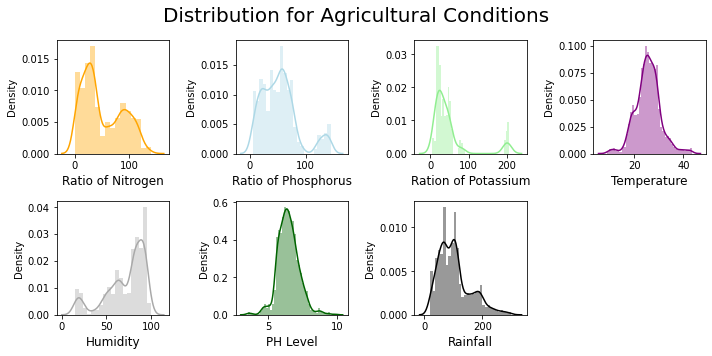

In [23]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,5), tight_layout=True)
plt.suptitle('Distribution for Agricultural Conditions', fontsize=20)

for i, condition in enumerate(conditions):
    plt.subplot(2, 4, i+1)
    sns.distplot(data[condition], color=colors[i])
    plt.xlabel(renamed_conditions[i], fontsize=12)


From the distribution above we can say that:
- There are few crops which require Phosphorus and Potassium in large ratio as their distribution graph shows they are right skewed.
- The distributions of Tempererature and PH Level follow the Gaussian Distribution so we can say most of the crops require average Temperature and PH Level.

In [26]:
# Lets find some more interesting facts

data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [59]:
@interact
def max_condition_requirements(condition=conditions):
    if(condition=='N' or condition=='P' or condition=='K'):
        print(f"Crop which require very High {renamed_conditions[conditions.index(condition)]} in the soil:\
        {data[data[condition]==data[condition].max()]['label'].unique()[0]}")
    else:
        print(f"Crop which require very High {renamed_conditions[conditions.index(condition)]}:\
              {data[data[condition]==data[condition].max()]['label'].unique()[0]}")
        print(f"Crops which require very Low {renamed_conditions[conditions.index(condition)]}:\
              {data[data[condition]==data[condition].min()]['label'].unique()[0]}")

interactive(children=(Dropdown(description='condition', options=('N', 'P', 'K', 'temperature', 'humidity', 'ph…

From the above findings we can say:
- Cotton requires the highest ratio of Nitrogen in the soil for growth.
- Grapes require the highest ratio of Phosphorus as well as Potassium in the soil for its growth.
- Papaya requires the highest temperature and grapes requires the lowest temperature conditions.
- Coconut requires highest humidity in the soil whereas chickpea requires the least humidity in the soil.
- Mothbeans can be grown in soil having very high PH value as well as very low PH value.
- Rice requires the highest amount of rainfall whereas muskmelon requires least amount of rainfall.

In [61]:
# Now lets find out which crop can be grown only in summer season,
# only in winter season and only in rainy season:

print("Summer Crops: ")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("---------------------------------------------------------------------------")
print("Winter Crops: ")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("---------------------------------------------------------------------------")
print("Rainy Crops: ")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())


Summer Crops: 
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
---------------------------------------------------------------------------
Winter Crops: 
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
---------------------------------------------------------------------------
Rainy Crops: 
['rice' 'papaya' 'coconut']


Above findings tell us that:
- Pigeonpeas, mothbeans, blackgram, mango, grapes, orange and papaya are best to be grown in summer season.
- For winter season the best crops are maize, pigeonpeas, lentil, pomegranate, grapes and orange.
- Rice, papaya and coconut would be best for rainy season.

In [62]:
# Now lets move on to build our model
# For this purpose we would use K-means clustering algorithm which belongs
# to the unsupervised machine learning algorithms.
# This would form clusters of crops those which requires same type of soil and
# climatic conditions.
# So first of all lets import the KMeans class from the scikit-learn library
# which performs the K-means clustering.

from sklearn.cluster import KMeans

In [65]:
# we do not need the labels for this algorithm to work so lets drop the labels
x = data.drop(['label'], axis=1)

# selecting all the values of the data
x = x.values

In [66]:
# checking the shape of our data
x.shape

(2200, 7)

To perform clustering analysis first of all we need to know
how many clusters should be there in our dataset.<br>
And to find out how many clusters should be there in our dataset
we are going to use the Elbow Method.<br>
## The Elbow Method
- The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.
- The intuition is that increasing the number of clusters will naturally improve the fit (explain more of the variation), since there are more parameters (more clusters) to use, but that at some point this is over-fitting, and the elbow reflects this.
- For example, given data that actually consist of k labeled groups – for example, k points sampled with noise – clustering with more than k clusters will "explain" more of the variation (since it can use smaller, tighter clusters), but this is over-fitting, since it is subdividing the labeled groups into multiple clusters.
- The idea is that the first clusters will add much information (explain a lot of variation), since the data actually consist of that many groups (so these clusters are necessary), but once the number of clusters exceeds the actual number of groups in the data, the added information will drop sharply, because it is just subdividing the actual groups. 
- Assuming this happens, there will be a sharp elbow in the graph of explained variation versus clusters: increasing rapidly up to k (under-fitting region), and then increasing slowly after k (over-fitting region).

Source: https://en.wikipedia.org/wiki/Elbow_method_(clustering)


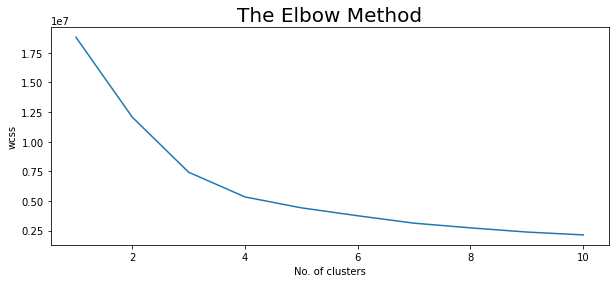

In [67]:
# So, now lets determine the optimal number of clusters within our dataset

plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
# Lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

From the plot we find there are three elbows at 2, 3 and 4,
we are going the use the max of them i.e. 4

In [68]:
# Lets implement the K Means algorithm to perform clustering analysis
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

# Lets find out the results
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis=1)
z = z.rename(columns={0: 'cluster'})

# Lets check the clusters of each Crop
print("Lets check the Results After applying the K Means Clustering Analysis \n")
print("Crops in first cluster: ", z[z['cluster']==0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in second cluster: ", z[z['cluster']==1]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in third cluster: ", z[z['cluster']==2]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in fourth cluster: ", z[z['cluster']==3]['label'].unique())




Lets check the Results After applying the K Means Clustering Analysis 

Crops in first cluster:  ['grapes' 'apple']
---------------------------------------------------------------
Crops in second cluster:  ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------
Crops in third cluster:  ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
---------------------------------------------------------------
Crops in fourth cluster:  ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']


These are the different clusters of the crops. The crops in same cluster require same kind of soil and climatic conditions and the crops of one cluster differ a lot from the crops of other cluster

Now we are going to build a Predictive model to predict which crop is best suitable for the given soil and climatic conditions. We know we have 22 classes in our labels so the best algorithm for this case would be to use Logistic Regression Model. Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to discrete classes.

In [69]:
# Lets split the dataset for Predictive Modelling
# Separate the features and label
y = data['label']
x = data.drop('label', axis=1)

print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (2200, 7)
Shape of y:  (2200,)


In [73]:
# Now lets create Training and Testing sets for Validation purpose
# for this we are going to use the train_test_split class of the sklearn.model_selection module
# Lets import the train_test_split
from sklearn.model_selection import train_test_split

# Now lets use it to split our dataset into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print("Shape of x train: ", x_train.shape)
print("Shape of x test: ", x_test.shape)
print("Shape of y train: ", y_train.shape)
print("Shape of y test: ", y_test.shape)

Shape of x train:  (1760, 7)
Shape of x test:  (440, 7)
Shape of y train:  (1760,)
Shape of y test:  (440,)


In [76]:
# Lets create a Predictive Model
# importing LogisticRegression from the sklearn library
from sklearn.linear_model import LogisticRegression

In [78]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [79]:
# Lets evaluate the performance of our model
# importing confusion_matric from the sklearn library
from sklearn.metrics import confusion_matrix

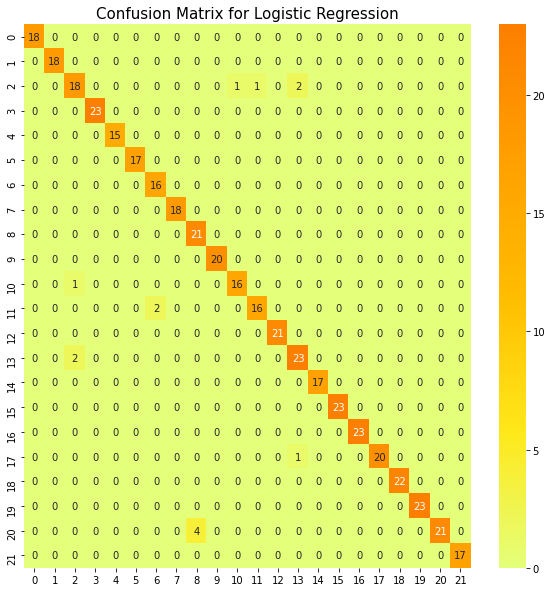

In [80]:
# Lets print the confusion matrix
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize=15)
plt.show()

In [82]:
# Lets print the classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

From the above result we can see that for all of the 22 classes the value of precision and recall is very high which means our model is very accurate.

In [84]:
# Now lets do some real time prediction
# For prediction we need to input the soil and climatic condition into our model
# and the output would be the name of the crop which is best to grow
# in the given soil and climatic condition.
# lets look at some of the input that we can give to our model 
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [89]:
prediction = model.predict((np.array([[90, 40, 40, 20, 80, 7, 200]])))
print("The suggested crop for the given soil and climatic conditions is: ", prediction)

The suggested crop for the given soil and climatic conditions is:  ['rice']


### Our Model has predicted the right crop. And It is ready to predict more.